In [2]:
import pandas as pd
import nltk
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [3]:
df = pd.read_csv('train.csv')

In [8]:
print(df.shape)
df.head()


(38932, 5)


,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [15]:
print(df['Is_Response'].nunique())
mood_count = df['Is_Response'].value_counts()
mood_count

2


happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [10]:
print(df['Device_Used'].value_counts())
print(df['Browser_Used'].value_counts())

Desktop    15026
Mobile     14976
Tablet      8930
Name: Device_Used, dtype: int64
Firefox              7367
Edge                 7134
Google Chrome        4659
InternetExplorer     4588
Mozilla Firefox      4328
Mozilla              3092
Chrome               2470
IE                   2439
Internet Explorer    2103
Safari                390
Opera                 362
Name: Browser_Used, dtype: int64


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

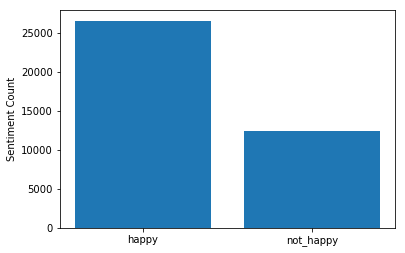

In [18]:
index = [1,2]
plt.bar(index,mood_count)
plt.xticks(index,['happy','not_happy'])
plt.ylabel('Sentiment Count')

In [19]:
stops = set(STOPWORDS)

## Negative response analysis

In [46]:
dummy_neg = df[df['Is_Response'] == 'not happy']

In [47]:
words = ' '.join(dummy_neg['Description'])

In [48]:
b_words = len(words)
b_words

12927374

In [49]:
words = ' '.join(word for word in words.split(' ') if word not in stops)

In [50]:
a_words = len(words)
a_words

8843945

In [51]:
print("Ratio of words after and before removal of stopwords {}".format(a_words/b_words))

Ratio of words after and before removal of stopwords 0.6841254070625635


(-0.5, 2999.5, 2499.5, -0.5)

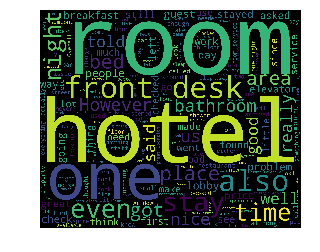

In [32]:
print("Negative Response WordClould")
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black',height = 2500, width = 3000).generate(words)
plt.imshow(wordcloud)
plt.axis('off')

## Positive Response analysis

In [52]:
dummy_pos = df[df['Is_Response'] == 'happy']

In [53]:
words = ' '.join(dummy_pos['Description'])

In [54]:
b_words = len(words)

In [55]:
words = ' '.join(word for word in words.split(' ') if word not in stops)

In [56]:
a_words = len(words)

In [57]:
print("Ratio of words after and before removal of stopwords {}".format(a_words/b_words))

Ratio of words after and before removal of stopwords 0.7029443455412356


Positive Response WordClould


(-0.5, 2999.5, 2499.5, -0.5)

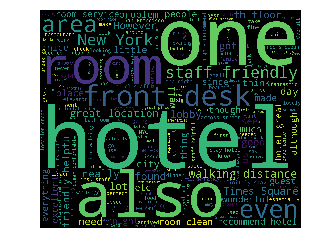

In [58]:
print("Positive Response WordClould")
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black',height = 2500, width = 3000).generate(words)
plt.imshow(wordcloud)
plt.axis('off')

### Both wordclouds have few words in common like 'hotel, room, one, desk, front). So one approach could be removing these words to train the data

In [61]:
def draw_WordCloud(df,column,stops):
    words = ' '.join(df[column])
    b_words = len(words)
    words = ' '.join(word for word in words.split(' ') if word not in stops)
    a_words = len(words)
    print("Ratio of words after and before removal of stopwords {}".format(a_words/b_words))
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black',height = 2500, width = 3000).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    return 

Ratio of words after and before removal of stopwords 0.6841254070625635


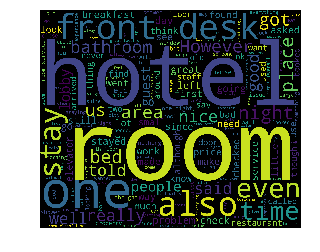

In [62]:
draw_WordCloud(dummy_neg,'Description',stops)

In [63]:
df['sentiment']  = df['Is_Response'].apply(
lambda x : 0 if x == 'not happy' else 1)

In [66]:
df['sentiment'].value_counts()

1    26521
0    12411
Name: sentiment, dtype: int64

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
count_vec = CountVectorizer(analyzer = "word")

In [70]:
inputDF = df['Description']
outputDF = df['sentiment']

In [71]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [74]:
inputDF,outputDF = shuffle(inputDF,outputDF,random_state = 42)
#inputDF.reset_index(drop = True,inplace = True)
#outputDF.reset_index(drop=True,inplace = True)

In [77]:
x_train,x_test,y_train,y_test = train_test_split(inputDF,outputDF,random_state=42)

In [83]:
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))
stops.update(':',',','!','.','" "',"' '")

In [105]:
count_vec_ngrams = CountVectorizer(analyzer = "word", ngram_range = (1,2))

In [106]:
train_features = count_vec.fit_transform(x_train)
train_features_grams = count_vec_ngrams.fit_transform(x_train)

In [107]:
test_features = count_vec.transform(x_test)
test_features_grams = count_vec_ngrams.transform(x_test)

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

## Decision Tree

In [109]:
clf = DecisionTreeClassifier()
clf_grams = DecisionTreeClassifier()
clf.fit(train_features,y_train)
clf_grams.fit(train_features_grams,y_train)
print(clf_grams.score(test_features_grams,y_test))
print(clf.score(test_features,y_test))

0.764512483304
0.760710983253


## MultinomialNB

In [110]:
clf = MultinomialNB()
clf_grams = MultinomialNB()
clf_grams.fit(train_features_grams,y_train)
clf.fit(train_features,y_train)
print(clf_grams.score(test_features_grams,y_test))
clf.score(test_features,y_test)

0.871262714477


0.86509811979862328

In [111]:
TF = TfidfVectorizer()
train_features = TF.fit_transform(x_train)
test_features = TF.transform(x_test)


In [112]:
clf = DecisionTreeClassifier()
clf.fit(train_features,y_train)
clf.score(test_features,y_test)

0.75084763176821123

In [113]:
clf = MultinomialNB()
clf.fit(train_features,y_train)
clf.score(test_features,y_test)

0.79379430802424744

# MultinomialNB is proved to be better than Decision Tree!
### TFidVectorizer is not performing better!

In [129]:
from collections import Counter
from nltk import word_tokenize

In [123]:
words = ' '.join(df['Description'])

In [124]:
len(words)

33764807

In [125]:
words = ' '.join(word for word in words.split(' ') if word not in stops)

In [126]:
len(words)

23987643

In [130]:
list_words = word_tokenize(words)

In [138]:
words[-100:]

'ess. The Westin wonderfully restored grande dame hotel. The beds linens excellent. Have pay internet'

In [137]:
list_words[-100:]

['busy',
 'rudely',
 'told',
 'us',
 'would',
 'go',
 'get',
 'mumbling',
 'us',
 'left-very',
 'bad',
 'customer',
 'service-given',
 'mistake',
 '.',
 'I',
 'would',
 'stay',
 'again',
 '.',
 'The',
 'experience',
 'ok.',
 'We',
 'paid',
 'extra',
 'view',
 'pool',
 ',',
 'got',
 'view',
 'palm',
 'tree',
 'blocking',
 'pool',
 '.',
 'oh',
 'well',
 '...',
 'better',
 'parking',
 'lot',
 'dumpster',
 '.',
 'The',
 'memorable',
 'part',
 'stay',
 'vent',
 'shower',
 'portal',
 'adjacent',
 'rooms',
 '.',
 'We',
 'heard',
 'conversations',
 'neighbors',
 'odor',
 'whatever',
 'weed',
 'smoking',
 'next',
 'door',
 'started',
 'fill',
 'room',
 '.',
 'At',
 'end',
 'day',
 ',',
 'sure',
 'staying',
 'next',
 'cheech',
 'chong',
 '.',
 'Welcome',
 'California',
 ',',
 'I',
 'guess',
 '.',
 'The',
 'Westin',
 'wonderfully',
 'restored',
 'grande',
 'dame',
 'hotel',
 '.',
 'The',
 'beds',
 'linens',
 'excellent',
 '.',
 'Have',
 'pay',
 'internet']

In [139]:
counts = Counter(list_words)

In [140]:
counts

Counter({'The': 78953,
         'room': 59022,
         'kind': 1714,
         'clean': 15342,
         'VERY': 681,
         'strong': 264,
         'smell': 1113,
         'dogs': 260,
         '.': 351124,
         'Generally': 54,
         'average': 1424,
         'ok': 1212,
         'overnight': 584,
         'stay': 25980,
         'you': 4759,
         "'re": 2577,
         'fussy': 67,
         'Would': 1536,
         'consider': 645,
         'staying': 4466,
         'price': 6132,
         'right': 6551,
         'Breakfast': 1731,
         'free': 7991,
         'better': 4734,
         'nothing': 2517,
         'I': 108745,
         'stayed': 14726,
         'Crown': 69,
         'Plaza': 721,
         'April': 311,
         '--': 53615,
         '-': 52341,
         ',': 231523,
         'staff': 22406,
         'friendly': 10296,
         'attentive': 830,
         'elevators': 1601,
         'tiny': 1239,
         '(': 29083,
         'about': 595,
         "'": 2148,

In [150]:
counts.most_common(20)

[("''", 557488),
 ('.', 351124),
 (',', 231523),
 ('I', 108745),
 ('The', 78953),
 ('hotel', 65861),
 ('room', 59022),
 ('--', 53615),
 ('-', 52341),
 ('!', 38512),
 ('We', 33955),
 (')', 30224),
 ('(', 29083),
 ("n't", 26635),
 ('stay', 25980),
 ('staff', 22406),
 ('great', 22230),
 ('would', 22026),
 ("'s", 19639),
 ('rooms', 18262)]

# We will use counter to eliminate common high frequency words!
## Can use a set of positive and negative words set for the training process!


In [167]:
inputDF = df['Description']
outputDF = df['sentiment']

In [180]:
stops = set(STOPWORDS)

In [181]:
stops.update('.','.',':','I','The',')','(','We','-','--','hotel','room','rooms')

In [188]:
def clean(data):
    #list_words = word_tokenize(data)
    words = data
    words = ' '.join(word for word in list_words if word in stops)
    return words

In [189]:
inputDF[0]

"The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing."

In [190]:
print(clean(inputDF[0]))

was of but had a of . below but for a if you not too . again if the was . was and just about than .


In [191]:
inputDF = [clean(inputDF.iloc[i,]) for i in range(inputDF.shape[0])]

In [198]:
len(inputDF)

38932

In [192]:
df['Description'][0]

"The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing."

In [193]:
inputDF[0]

'was of but had a of . below but for a if you not too . again if the was . was and just about than .'

In [199]:
count_vec = CountVectorizer(analyzer = "word")
count_vec_ngrams = CountVectorizer(analyzer = "word", ngram_range = (1,2))
train_features = count_vec.fit_transform(inputDF)
train_features_grams = count_vec_ngrams.fit_transform(inputDF)

In [200]:
y_train = df['sentiment']

In [201]:
clf = MultinomialNB()
clf_grams = MultinomialNB()
clf_grams.fit(train_features_grams,y_train)
clf.fit(train_features,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [202]:
testDF = pd.read_csv('test.csv')

In [203]:
testDF.shape

(29404, 4)

In [206]:
testing_df = testDF['Description']

In [207]:
testing_df = [clean(testing_df.iloc[i,]) for i in range(testing_df.shape[0])]

In [208]:
test_features = count_vec.transform(testing_df)
test_features_grams = count_vec_ngrams.transform(testing_df)

In [211]:
prediction = clf.predict(test_features)

In [216]:
testDF['Is_Response'] = prediction

In [218]:
testDF['Is_Response'] = testDF['Is_Response'].apply(lambda x:'not_happy' if x==0 else 'happy') 

In [221]:
submissionDF = testDF[['User_ID','Is_Response']]

In [231]:
submissionDF.to_csv('submission_1.csv',columns=['User_ID','Is_Response'],index=False)